- Support Vector Machine is a Supervised Learning Algorithm
  1. Aim is to create the best line or decision boundary that can segregate n-dimensional space into classes so that new data can be classified in right category. This decision boundary is called Hyperplane
  2. SVM is of two type - Linear and Non-Linear
  3. Linear SVM - when data can be separated using a straight line 
     , Non - Linear SVM  - When data cannot be separated using a straight line and to do so we use kernel
  4. Kernel is used to solve non-linear problem as a linear
  5. To choose the right hyperplane, maximise the distance between nearest data point and hyperplane.
  6. This distance between nearest data point and hyperplane is called Margin.
- Gamma and Regularization
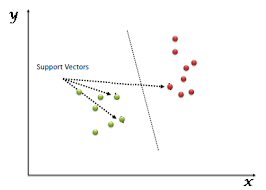

- Gamma = Talks about support vectors
  - High Gamma = close to decision boundary
  - Low Gamma = far from decision boundary
- Regularization(C) = Talks about boundary
  - High Regularization
  - Low Regularization

In [1]:
import pandas as pd
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le_target = LabelEncoder()
df['Species_le'] = le_target.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_le
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [5]:
df = df.drop(['Species'],axis = 'columns')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_le
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [6]:
df1 = df.drop(['Id'],axis = 'columns')
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_le
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
X = df1.drop(['Species_le'],axis = 'columns')
y = df1['Species_le']

In [8]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species_le, Length: 150, dtype: int32

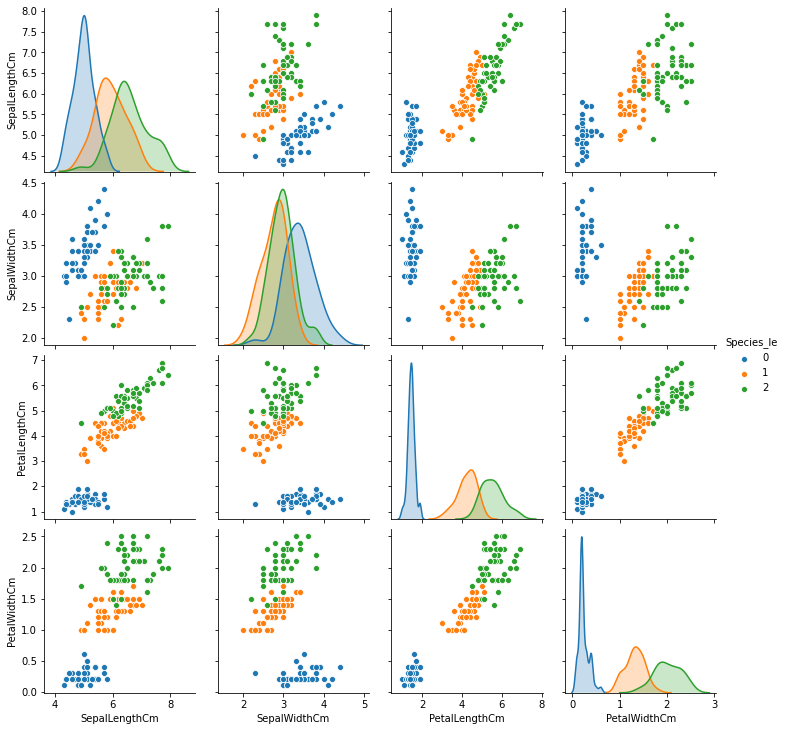

In [10]:
import seaborn as sns
sns.pairplot(data = df1, hue = 'Species_le')

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [24]:
from sklearn.svm import SVC
model = SVC()

In [25]:
model.fit(X_train,y_train)

SVC()

In [26]:
model.score(X_test,y_test)

0.9666666666666667

In [28]:
model1 = SVC(kernel = 'linear')
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.9666666666666667

In [29]:
model2 = SVC(C = 40)
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.9

In [31]:
model2 = SVC(gamma = 10)
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.9333333333333333

# SVM on Iris data has been used and Gamma,Regularization has also been used.